In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("/Volumes/workspace/students/sampledata/sample_ml_data.csv")
print("Original Data:")
print(df)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Salary'] = imputer.fit_transform(df[['Salary']])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=["Gender"], drop_first=True)

label_encoder = LabelEncoder()
df_encoded["Purchased"] = label_encoder.fit_transform(df_encoded["Purchased"])

# Scale numerical features
scaler = StandardScaler()
df_encoded[["Age", "Salary"]] = scaler.fit_transform(df_encoded[["Age", "Salary"]])

# Split into train and test sets
X = df_encoded.drop("Purchased", axis=1)
y = df_encoded["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nCleaned and Preprocessed Data (Train):")
print(X_train.head())


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 📂 Load your dataset
df = pd.read_csv("/Volumes/workspace/students/sampledata/sample_ml_data.csv")  # Replace with the file you are using

# 🎯 Prepare Features (X) and Target (y)
X = df.iloc[:, :-1]   # All columns except last
y = df.iloc[:, -1]    # Last column as target

# ⚙ Convert categorical features to numerical
X = pd.get_dummies(X)

# ✂ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🛠 Build Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 📊 Cross-Validation to assess performance
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=2, error_score='raise')
print("✅ Cross-validation scores:", cv_scores)
print("✅ Average cross-validation accuracy:", cv_scores.mean())

# 🔍 Hyperparameter Tuning with GridSearch
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=2, error_score='raise')
grid_search.fit(X_train, y_train)

print("\n🏆 Best Hyperparameters:", grid_search.best_params_)
print("🏅 Best Cross-validation Score:", grid_search.best_score_)

# 🧪 Final Evaluation on Test Set
y_pred = grid_search.predict(X_test)
print("\n📈 Classification Report on Test Data:\n", classification_report(y_test,y_pred))


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-6117612572702009>, line 28
     22 pipeline = Pipeline([
     23     ('scaler', StandardScaler()),
     24     ('classifier', RandomForestClassifier(random_state=42))
     25 ])
     27 # 📊 Cross-Validation to assess performance
---> 28 cv_scores = cross_val_score(pipeline, X_train, y_train, cv=2, error_score='raise')
     29 print("✅ Cross-validation scores:", cv_scores)
     30 print("✅ Average cross-validation accuracy:", cv_scores.mean())

File /databricks/python/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:562, in cross_val_score(estimator, X, y, groups, scoring, cv, n_jobs, verbose, fit_params, pre_dispatch, error_score)
    559 # To ensure multimetric format is not supported
    560 scorer = check_scoring(estimator, scoring=scoring)
--> 562 cv_results = cross_validate(
    563     estimator=es

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 5, 10]
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid
best_model = grid_search.best_estimator_

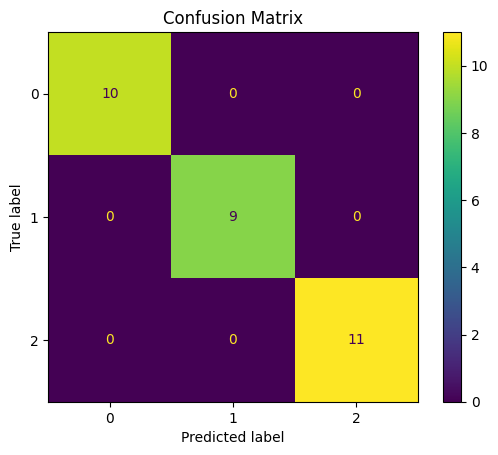

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))